In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# Make the data set and labels
# Create feature vector num. of samples x num. of features
#X= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
# Create feature vector num. of samples x 1 (bot or not)
#y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])
import pickle
import pandas as pd
#X_b = pd.read_pickle("bot_features.pkl")
#X_n = pd.read_pickle("nonbot_features.pkl")
X_b = np.load(open('bot_features.npy','rb'))
X_n = np.load(open('nonbot_features.npy','rb'))
X_b = [ row[1:] for row in X_b ]
X_n = [ row[1:] for row in X_n ]
print(np.size(X_b[1]))

18


In [75]:
# Modified from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py 
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    cnf_matrix = confusion_matrix(y_test, y_pred)
    cm = cnf_matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    np.set_printoptions(precision=3)
    plt.show()
# plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix (Normalize) ')
class_names = ['bot', 'not-bot']

In [76]:
# modified from : http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics
import matplotlib.pyplot as plt
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)
def plot_roc(y_test,y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# After the Data is Processed the data is 75/25 split for train/test

In [4]:
# Split the data set for all classifiers first
from sklearn.model_selection import train_test_split
X_train = []
X_test = []
y_train = []
y_test = []
y_b = np.ones(len(X_b))
y_n = np.zeros(len(X_n))
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.25, random_state=42)
X_train.extend(X_train_b)
X_test.extend(X_test_b)
y_train.extend(y_train_b)
y_test.extend(y_test_b)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.25, random_state=24)
X_train.extend(X_train_n)
X_test.extend(X_test_n)
y_train.extend(y_train_n)
y_test.extend(y_test_n)


# Gaussian Naive Bayes 

In [35]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes for tweets
# Create a Gaussian Classifier
clf_NB = GaussianNB()
# Train the model using the training sets 
clf_NB.fit(X_train, y_train)
#Predict Output 
predicted_NB = clf_NB.predict(X_test)
y_true = y_test
y_pred = predicted_NB
print('For Gaussian Naive Bayes:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Gaussian Naive Bayes:
The accuracy is: 81.647940% 
The AUC score is: 0.823927 
The precision is: 0.736842 
The recall is: 0.948207 
The f1 score is: 0.829268 


In [42]:
X_val = np.load(open('test_features.npy','rb'))
pred_2f = np.array(clf_NB.predict(X_val))
pred_3f = []
for i in range (len(pred_2f)):
    pred_3f.append([pred_2f[i]])
pred_3f = np.array(pred_3f)
print(pred_3f.shape)
np.save('pred_NB.npy',pred_3f)

(577L, 1L)


# Decison Tree

In [4]:
# Decison tree for tweets
# Think about using PCA to simplfy data and have better DT
# To find best Tree depth
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from math import floor
# Should test depth from 3 to num. of features
#param_grid = {'max_depth': np.arange(3, len(X_train[1])), 'min_samples_split':np.floor(len(y_train)*(np.arange(1,10,.5)/100))}
param_grid = {'max_depth': np.arange(3, len(X_train[1])), 'min_samples_split':(np.arange(.5,10,.5)/100)}
#param_grid = {'max_depth': np.arange(3, len(X_train[1])), 'min_samples_split':[5,10,12]}
clf_DT = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
clf_DT = clf_DT.fit(X_train, y_train)
#predicted_DT = clf_DT.predict_proba(xtest)[:, 1]
predicted_DT = clf_DT.predict(X_test)
best_set = clf_DT.best_params_
y_true = y_test
y_pred = predicted_DT
print('For Decision Tree:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))
print(best_set)

For Decision Tree:
The accuracy is: 89.325843% 
The AUC score is: 0.891860 
The precision is: 0.900826 
The recall is: 0.868526 
The f1 score is: 0.884381 
{'max_depth': 8, 'min_samples_split': 0.0050000000000000001}


In [39]:
from sklearn import tree
clf_DT1 = tree.DecisionTreeClassifier(max_depth=6)
clf_DT1 = clf_DT1.fit(X_train, y_train)
#predicted_DT = clf_DT.predict_proba(xtest)[:, 1]
predicted_DT1 = clf_DT1.predict(X_test)
#best_set = clf_DT1.best_params_
y_true = y_test
y_pred = predicted_DT1
print('For Decision Tree:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Decision Tree:
The accuracy is: 96.067416% 
The AUC score is: 0.961096 
The precision is: 0.949219 
The recall is: 0.968127 
The f1 score is: 0.958580 


In [41]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(clf_DT1.predict(X_val))
pred_4f = []
for i in range (len(pred_1f)):
    pred_4f.append([pred_1f[i]])
pred_4f = np.array(pred_4f)
print(pred_4f.shape)
np.save('pred_DT1.npy',pred_4f)

(577L, 1L)


In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=8))
ada = ada.fit(X_train,y_train) 
pred_ada = ada.predict(X_test)
y_true = y_test
y_pred = pred_ada
print('For Decision Tree with AdaBoost:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Decision Tree with AdaBoost:
The accuracy is: 90.823970% 
The AUC score is: 0.907121 
The precision is: 0.913934 
The recall is: 0.888446 
The f1 score is: 0.901010 


In [59]:
X_val = np.load(open('test_features.npy','rb'))
X_id = np.load(open('test_ids.npy','rb'))
#X_id = pickle.load('test_ids.pkl')
X_id = X_id.astype(np.int64)
print(X_id.shape)
print(X_id)
pred_ada = np.array(ada.predict(X_val))
pred2 = []
for i in range (len(pred_ada)):
    pred2.append([pred_ada[i]])
pred2 = np.array(pred2)
print(pred2.shape)
#np.save('pred.npy',pred2)
#outset = [X_id,pred_ada]
#outset = np.append((X_id,pred2),0)
outset = np.column_stack((X_id,pred2))
#np.set_printoptions(suppress=True)
print(outset.astype(np.int64))
#np.savetxt("pred.csv", outset, delimiter=",")
# np.savetxt("pred.csv", outset, fmt="%10s %10.3f")
#outset.tofile("pred2.csv",sep=',')
#np.savetxt("pred.csv", (X_id.T,pred_ada.T))

(577L, 1L)
[[2281292622]
 [2344040251]
 [         765871267]
 [4772373433]
 [        1324548560]
 [2561341789]
 [         347810134]
 [         856303860]
 [832874807754502144]
 [          88856792]
 [713556609784479744]
 [        1566746503]
 [          90420314]
 [         184910040]
 [         157690631]
 [          42420346]
 [          42382447]
 [          43993280]
 [2305236733]
 [742793690838642688]
 [          31348594]
 [         122085859]
 [          23573083]
 [          43152482]
 [         188857501]
 [2911272579]
 [          35094637]
 [         146252766]
 [          85430866]
 [          55117855]
 [827941922941628420]
 [         234837526]
 [783181941524668416]
 [2236911966]
 [         238706610]
 [         537915105]
 [          19058681]
 [2568986838]
 [3002601144]
 [         515652246]
 [3411760894]
 [          34507480]
 [        1389883381]
 [         702010302]
 [          91425881]
 [         401790812]
 [          73992972]
 [         256722290]
 [           

In [60]:
import pandas as pd
pf = pd.DataFrame(outset)
pf.to_csv('pred5.csv',header=None)

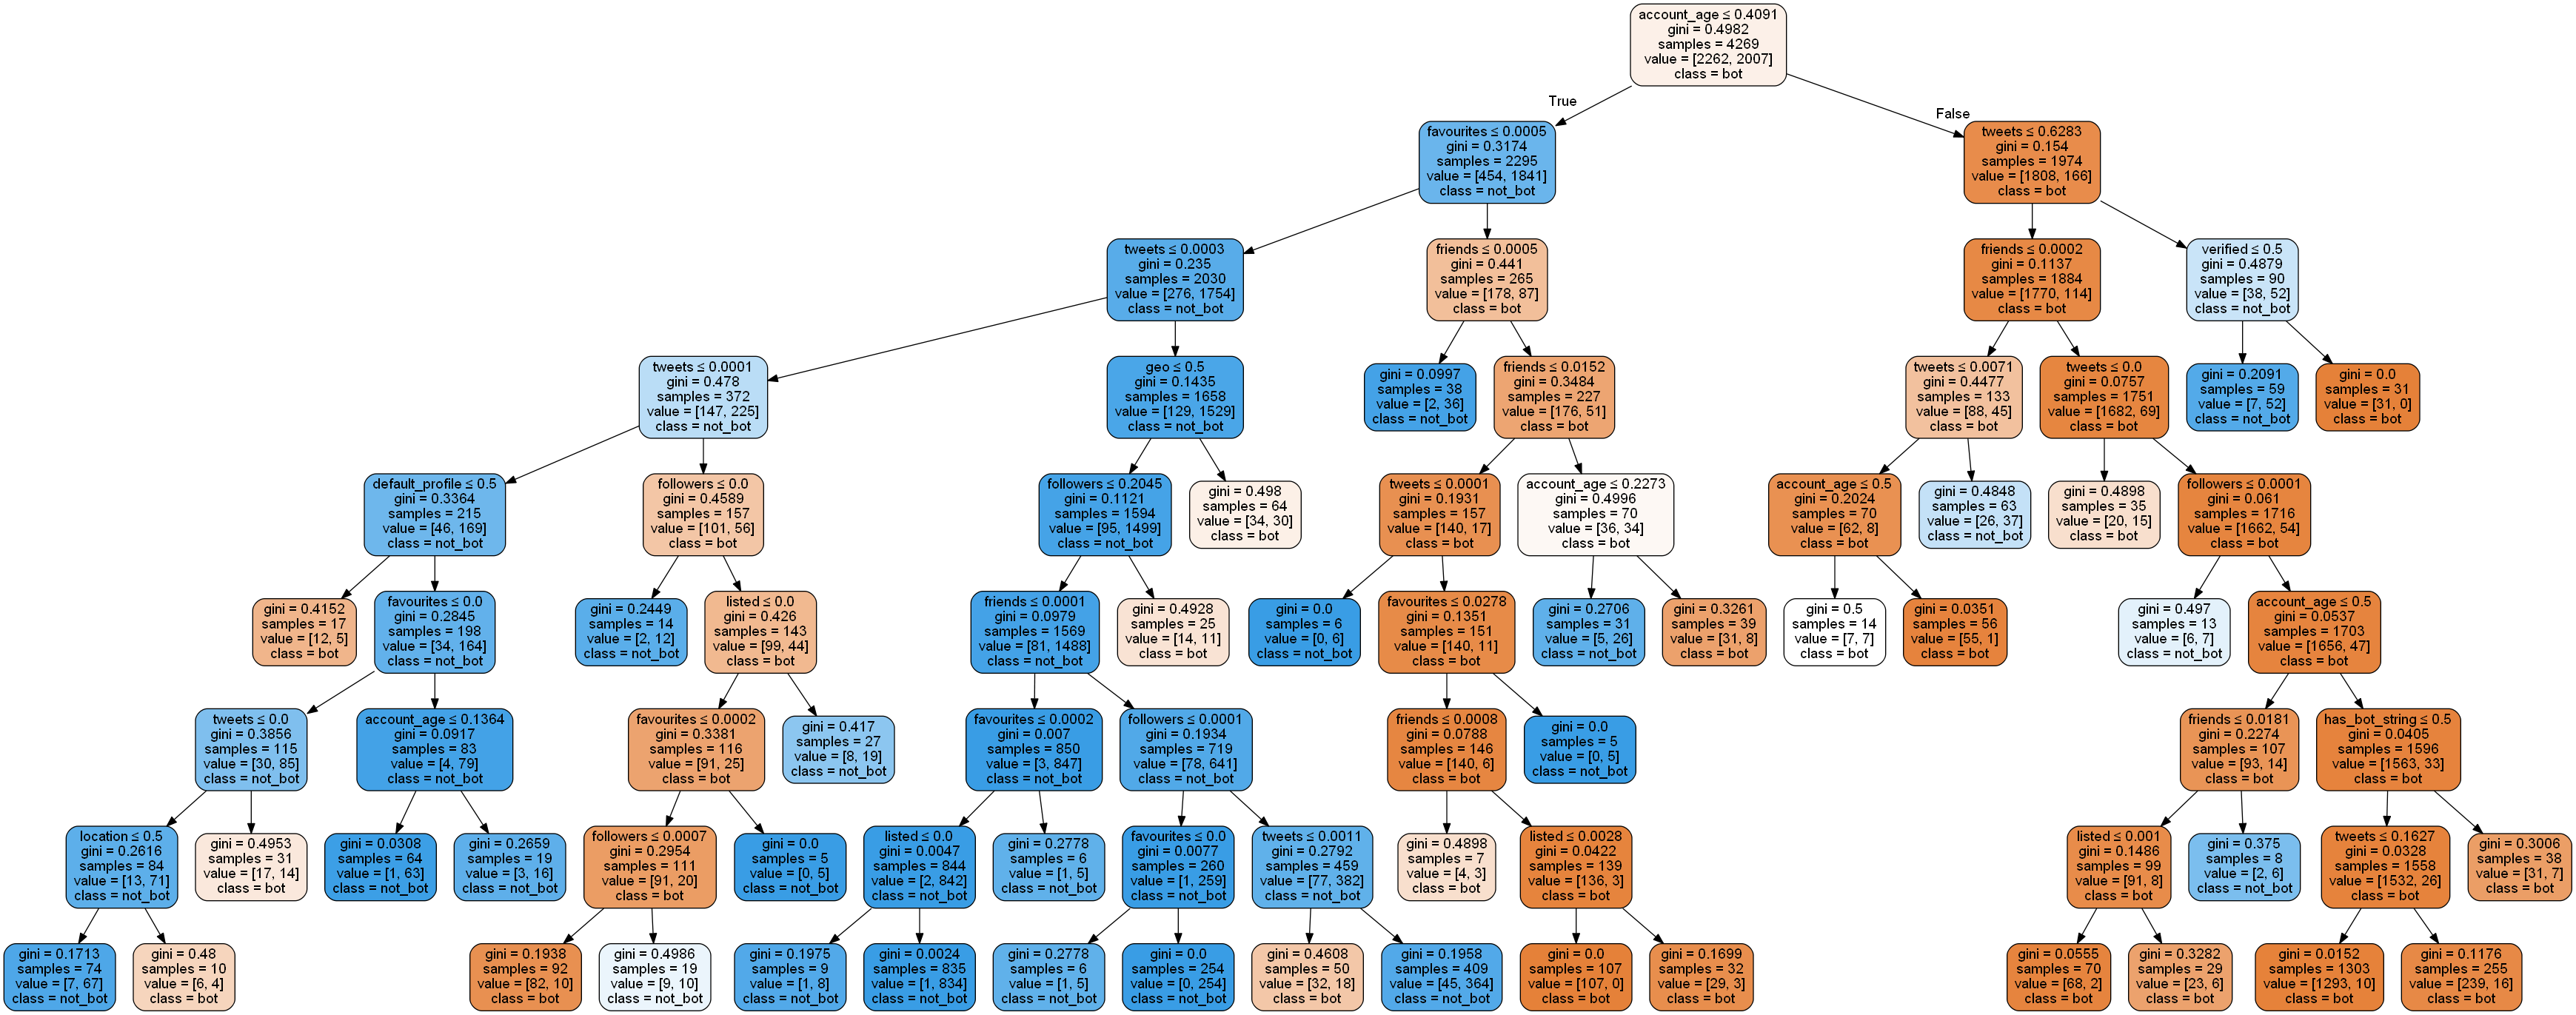

In [213]:
clf_DT2 = tree.DecisionTreeClassifier(max_depth=8,min_samples_split= 0.014999999999999999)
clf_DT2 = clf_DT2.fit(X_train, y_train)
# To visualize the tree
from IPython.display import Image  
import pydotplus
names = ['has_bot_string','account_age','followers','favourites','contributors','friends','geo','has_extended_profile','is_translation_enabled','lang','location','notifications','tweets','verified','url','default_profile','default_profile_image','listed']
clss = ['bot','not_bot']
dot_data = tree.export_graphviz(clf_DT2, out_file=None, 
                     feature_names=names,  
                     class_names=clss,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# Random Forest

In [73]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
# param_grid = {"max_depth": [np.arange(3, len(X_train[1])), None],
#               "min_samples_split": (len(y_train)*(np.arange(0,11,.5)/100)),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}
param_grid = {#"max_depth": [np.arange(3, len(X_train[1])), None],
              #"max_depth": [3,  4,  5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None],
              "min_samples_split": (np.arange(.5,10,.5)/100),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid)
grid_search_RF.fit(X_train, y_train)
predicted_RF = grid_search_RF.predict(X_test)
y_pred = predicted_RF
print('For Random Forest:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))
best_set_RF = grid_search_RF.best_params_
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(grid_search_RF.cv_results_)

For Random Forest:
The accuracy is: 90.262172% 
The AUC score is: 0.902496 
The precision is: 0.893281 
The recall is: 0.900398 
The f1 score is: 0.896825 
Model with rank: 1
Mean validation score: 0.913 (std: 0.005)
Parameters: {'min_samples_split': 0.014999999999999999, 'bootstrap': False, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 0.913 (std: 0.012)
Parameters: {'min_samples_split': 0.02, 'bootstrap': False, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.912 (std: 0.008)
Parameters: {'min_samples_split': 0.025000000000000001, 'bootstrap': True, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.912 (std: 0.007)
Parameters: {'min_samples_split': 0.040000000000000001, 'bootstrap': False, 'criterion': 'entropy'}



In [70]:
X_val = np.load(open('test_features.npy','rb'))
pred_RF = np.array(grid_search_RF.predict(X_val))
pred_RF2 = []
for i in range (len(pred_RF)):
    pred_RF2.append([pred_RF[i]])
pred_RF2 = np.array(pred_RF2)
print(pred_RF2.shape)
np.save('pred_RF2.npy',pred2)

(577L, 1L)


# Single SVM

In [15]:
# SVM
# recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], 
# or standardize it to have mean 0 and variance 1
from sklearn.svm import SVC
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree' : np.arange(1,6), 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']
score = scores[1]
clf_SVM = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring='%s_macro' % score)
clf_SVM.fit(X_train, y_train)
best_set_SVM = clf_SVM.best_params_
predicted_SVM = clf_SVM.predict(X_test)
y_pred = predicted_SVM
print('For SVM:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For SVM:
The accuracy is: 89.325843% 
The AUC score is: 0.895464 
The precision is: 0.854015 
The recall is: 0.932271 
The f1 score is: 0.891429 


In [16]:
X_val = np.load(open('test_features.npy','rb'))
pred_SVM3 = np.array(clf_SVM.predict(X_val))
pred_SVM4 = []
for i in range (len(pred_SVM3)):
    pred_SVM4.append([pred_SVM3[i]])
pred_SVM4 = np.array(pred_SVM4)
print(pred_SVM4.shape)
np.save('pred_SVM4.npy',pred_SVM4)

(577L, 1L)


# Ensemble SVM

In [14]:
# EnsembleSVM
# Want to randomly sample data np.random.shuffle(x)
# And then trian multiple SVM's 
# Hard vote on a label
#print(best_set_SVM)
from math import floor
from sklearn.svm import SVC
#best_set_SVM = C=10, kernel=linear,
n_sets = 10
#nsn = floor(len(X_train_n)/n_sets)
#nsb = floor(len(X_train_b)/n_sets)
svm1 = SVC(C=10, kernel='linear', random_state=1)
svm2 = SVC(C=10, kernel='linear', random_state=2)
svm3 = SVC(C=10, kernel='linear', random_state=3)
svm4 = SVC(C=10, kernel='linear', random_state=4)
svm5 = SVC(C=10, kernel='linear', random_state=5)
svm6 = SVC(C=10, kernel='linear', random_state=6)
svm7 = SVC(C=10, kernel='linear', random_state=7)
svm8 = SVC(C=10, kernel='linear', random_state=8)
svm9 = SVC(C=10, kernel='linear', random_state=9)
svm10 = SVC(C=10, kernel='linear', random_state=10)
sb = np.array_split(X_train_b,n_sets)
sn = np.array_split(X_train_n,n_sets)
sbc = np.array_split(y_train_b,n_sets)
snc = np.array_split(y_train_n,n_sets)
for i in range(0,n_sets):
    sb[i]=np.concatenate((sb[i], sn[i]), axis=0)
    sbc[i]=np.concatenate((sbc[i], snc[i]), axis=0)
svm1.fit(sb[0],sbc[1])
svm2.fit(sb[1],sbc[2])
svm3.fit(sb[2],sbc[3])
svm4.fit(sb[3],sbc[4])
svm5.fit(sb[4],sbc[5])
svm6.fit(sb[5],sbc[6])
svm7.fit(sb[6],sbc[6])
svm8.fit(sb[7],sbc[7])
svm9.fit(sb[8],sbc[8])
svm10.fit(sb[9],sbc[9])
vt1 = svm1.predict(X_test)
vt2 = svm2.predict(X_test)
vt3 = svm3.predict(X_test)
vt4 = svm4.predict(X_test)
vt5 = svm5.predict(X_test)
vt6 = svm6.predict(X_test)
vt7 = svm7.predict(X_test)
vt8 = svm8.predict(X_test)
vt9 = svm9.predict(X_test)
vt10 = svm10.predict(X_test)
vt_count = np.array(vt1)+np.array(vt2)+np.array(vt3)+np.array(vt4)+np.array(vt5)+np.array(vt6)+np.array(vt7)+np.array(vt8)+np.array(vt9)+np.array(vt10)
predicted_ES = [ vt_count[i]>=5 for i in range(0,len(vt_count)) ]
y_pred = predicted_ES
print('For Ensemble SVM:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

ValueError: Found input variables with inconsistent numbers of samples: [161, 160]

# Hybrid Ensemble: SVM and Random Forest

In [43]:
# Hybrid Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf1 = RandomForestClassifier( random_state=1)
clf2 = SVC(C=10, kernel='linear', random_state=1)
eclf1 = VotingClassifier(estimators=[('RF', clf1), ('SVM', clf2)], voting='hard')
# hard = majority vote, soft = argmax of the sums of the predicted probabilities
eclf1 = eclf1.fit(X_train,y_train)
predicted_ens = eclf1.predict(X_test)
y_pred = predicted_ens
print('For Hybrid Ensemble:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))
plot_confusion_matrix(y_true, y_pred, classes=class_names,title='Confusion matrix (Normalize) ')

For Hybrid Ensemble:
The accuracy is: 96.441948% 
The AUC score is: 0.962377 
The precision is: 0.995726 
The recall is: 0.928287 
The f1 score is: 0.960825 


NameError: name 'plot_confusion_matrix' is not defined

In [44]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(eclf1.predict(X_val))
pred_4f = []
for i in range (len(pred_1f)):
    pred_4f.append([pred_1f[i]])
pred_4f = np.array(pred_4f)
print(pred_4f.shape)
np.save('pred_ECL.npy',pred_4f)

(577L, 1L)


In [18]:
# Modified EnsembleSVM
# Split data per column
# And then trian multiple SVM's, 1 per feature 
# Hard vote on a label
#print(best_set_SVM)
from sklearn.svm import SVC
#best_set_SVM = C=10, kernel=linear,
# Same random state for better control
svm1 = SVC(C=10, kernel='linear', random_state=1)
svm2 = SVC(C=10, kernel='linear', random_state=1)
svm3 = SVC(C=10, kernel='linear', random_state=1)
svm4 = SVC(C=10, kernel='linear', random_state=1)
svm5 = SVC(C=10, kernel='linear', random_state=1)
svm6 = SVC(C=10, kernel='linear', random_state=1)
svm7 = SVC(C=10, kernel='linear', random_state=1)
svm8 = SVC(C=10, kernel='linear', random_state=1)
svm9 = SVC(C=10, kernel='linear', random_state=1)
svm10 = SVC(C=10, kernel='linear', random_state=1)
svm11 = SVC(C=10, kernel='linear', random_state=1)
svm12 = SVC(C=10, kernel='linear', random_state=1)
svm13 = SVC(C=10, kernel='linear', random_state=1)
svm14 = SVC(C=10, kernel='linear', random_state=1)
svm15 = SVC(C=10, kernel='linear', random_state=1)
svm16 = SVC(C=10, kernel='linear', random_state=1)
svm17 = SVC(C=10, kernel='linear', random_state=1)
svm18 = SVC(C=10, kernel='linear', random_state=1)
X_train2 = np.array(X_train)
svm1.fit(X_train2[:,0].reshape(-1, 1),y_train)
svm2.fit(X_train2[:,1].reshape(-1, 1),y_train)
svm3.fit(X_train2[:,2].reshape(-1, 1),y_train)
svm4.fit(X_train2[:,3].reshape(-1, 1),y_train)
svm5.fit(X_train2[:,4].reshape(-1, 1),y_train)
svm6.fit(X_train2[:,5].reshape(-1, 1),y_train)
svm7.fit(X_train2[:,6].reshape(-1, 1),y_train)
svm8.fit(X_train2[:,7].reshape(-1, 1),y_train)
svm9.fit(X_train2[:,8].reshape(-1, 1),y_train)
svm10.fit(X_train2[:,9].reshape(-1, 1),y_train)
svm11.fit(X_train2[:,10].reshape(-1, 1),y_train)
svm12.fit(X_train2[:,11].reshape(-1, 1),y_train)
svm13.fit(X_train2[:,12].reshape(-1, 1),y_train)
svm14.fit(X_train2[:,13].reshape(-1, 1),y_train)
svm15.fit(X_train2[:,14].reshape(-1, 1),y_train)
svm16.fit(X_train2[:,15].reshape(-1, 1),y_train)
svm17.fit(X_train2[:,16].reshape(-1, 1),y_train)
svm18.fit(X_train2[:,17].reshape(-1, 1),y_train)
vt = []
X_test2 = np.array(X_test)
vt.append(svm1.predict(X_test2[:,0].reshape(-1, 1)))
vt.append(svm2.predict(X_test2[:,1].reshape(-1, 1)))
vt.append(svm3.predict(X_test2[:,2].reshape(-1, 1)))
vt.append(svm4.predict(X_test2[:,3].reshape(-1, 1)))
vt.append(svm5.predict(X_test2[:,4].reshape(-1, 1)))
vt.append(svm6.predict(X_test2[:,5].reshape(-1, 1)))
vt.append(svm7.predict(X_test2[:,6].reshape(-1, 1)))
vt.append(svm8.predict(X_test2[:,7].reshape(-1, 1)))
vt.append(svm9.predict(X_test2[:,8].reshape(-1, 1)))
vt.append(svm10.predict(X_test2[:,9].reshape(-1, 1)))
vt.append(svm11.predict(X_test2[:,10].reshape(-1, 1)))
vt.append(svm12.predict(X_test2[:,11].reshape(-1, 1)))
vt.append(svm13.predict(X_test2[:,12].reshape(-1, 1)))
vt.append(svm14.predict(X_test2[:,13].reshape(-1, 1)))
vt.append(svm15.predict(X_test2[:,14].reshape(-1, 1)))
vt.append(svm16.predict(X_test2[:,15].reshape(-1, 1)))
vt.append(svm17.predict(X_test2[:,16].reshape(-1, 1)))
vt.append(svm18.predict(X_test2[:,17].reshape(-1, 1)))
"""
vt_count = np.array(vt1)+np.array(vt2)+np.array(vt3)+np.array(vt4)+np.array(vt5)+np.array(vt6)+np.array(vt7)+np.array(vt8)+np.array(vt9)+np.array(vt10)
predicted_ES = [ vt_count[i]>=5 for i in range(0,len(vt_count)) ]
y_pred = predicted_ES
print('For Ensemble SVM:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))
"""
for i in range(18):
    print('For Ensemble SVM %i:' % i)
    acc = accuracy_score(y_test, vt[i])
    print ("The accuracy is: %f%% " % ( 100*acc ))

For Ensemble SVM 0:
The accuracy is: 67.228464% 
For Ensemble SVM 1:
The accuracy is: 85.205993% 
For Ensemble SVM 2:
The accuracy is: 66.666667% 
For Ensemble SVM 3:
The accuracy is: 52.996255% 
For Ensemble SVM 4:
The accuracy is: 52.996255% 
For Ensemble SVM 5:
The accuracy is: 52.996255% 
For Ensemble SVM 6:
The accuracy is: 69.662921% 
For Ensemble SVM 7:
The accuracy is: 56.367041% 
For Ensemble SVM 8:
The accuracy is: 52.996255% 
For Ensemble SVM 9:
The accuracy is: 52.996255% 
For Ensemble SVM 10:
The accuracy is: 62.921348% 
For Ensemble SVM 11:
The accuracy is: 52.996255% 
For Ensemble SVM 12:
The accuracy is: 55.617978% 
For Ensemble SVM 13:
The accuracy is: 68.726592% 
For Ensemble SVM 14:
The accuracy is: 56.367041% 
For Ensemble SVM 15:
The accuracy is: 69.101124% 
For Ensemble SVM 16:
The accuracy is: 54.119850% 
For Ensemble SVM 17:
The accuracy is: 64.794007% 


In [19]:
vt_count = np.array(vt[0])+np.array(vt[1])+np.array(vt[2])+np.array(vt[6])+np.array(vt[10])+np.array(vt[13])+np.array(vt[15])+np.array(vt[17])
predicted_ES = [ vt_count[i]>=6 for i in range(0,len(vt_count)) ]
y_pred = predicted_ES
print('For Ensemble SVM:')
acc = accuracy_score(y_test, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))

For Ensemble SVM:
The accuracy is: 83.707865% 


In [19]:
y_pred = svm2.predict(X_train2[:,1].reshape(-1, 1))
acc = accuracy_score(y_train, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))

The accuracy is: 85.515395% 


In [21]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(svm2.predict(X_val[:,1].reshape(-1, 1)))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_1f.npy',pred_2f)

(577L, 1L)


In [10]:
X_b2 = np.array(X_b)
X_n2 = np.array(X_n)
y_pred = svm2.predict(X_b2[:,1].reshape(-1, 1))
y_pred2 = svm2.predict(X_n2[:,1].reshape(-1, 1))
bad_bot = []
bad_not = []
for i in range(len(y_pred)):
    if (y_pred[i] != 1):
        bad_bot.append(i)
for i in range(len(y_pred)):
    if (y_pred2[i] != 0):
        bad_not.append(i)
print(bad_bot)
print(bad_not)

[23, 24, 62, 64, 86, 92, 96, 99, 101, 115, 117, 120, 125, 146, 157, 160, 167, 169, 180, 192, 206, 220, 222, 226, 257, 263, 285, 300, 315, 318, 322, 325, 333, 335, 348, 364, 376, 377, 381, 384, 389, 405, 409, 414, 448, 453, 501, 527, 529, 555, 560, 564, 573, 574, 575, 582, 593, 595, 605, 616, 634, 639, 656, 659, 679, 683, 685, 689, 713, 717, 745, 748, 752, 768, 796, 797, 819, 820, 876, 898, 932, 956, 959, 966, 972, 995]
[5, 6, 7, 10, 14, 16, 22, 37, 38, 40, 51, 52, 58, 62, 68, 71, 81, 82, 87, 92, 100, 102, 113, 114, 120, 127, 132, 133, 142, 145, 147, 148, 156, 158, 161, 164, 167, 169, 171, 173, 178, 179, 192, 195, 197, 207, 215, 216, 219, 245, 251, 255, 260, 263, 267, 271, 275, 282, 296, 297, 300, 307, 310, 312, 313, 315, 321, 325, 327, 329, 341, 343, 355, 365, 367, 374, 380, 385, 391, 400, 401, 402, 406, 417, 418, 419, 424, 431, 433, 438, 442, 447, 456, 461, 465, 476, 481, 489, 492, 493, 496, 497, 499, 504, 517, 540, 541, 543, 551, 552, 564, 572, 580, 587, 590, 617, 622, 627, 639, 650,

In [6]:
# SVM
# recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], 
# or standardize it to have mean 0 and variance 1
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree' : np.arange(1,6), 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']
score = scores[1]
clf_SVM = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring='%s_macro' % score)
X_test2 = np.array(X_test)
X_train2 = np.array(X_train)
clf_SVM.fit(X_train2[:,[0,1,2,6,10,13,15,17]], y_train)
best_set_SVM = clf_SVM.best_params_
predicted_SVM = clf_SVM.predict(X_test2[:,[0,1,2,6,10,13,15,17]])
y_pred = predicted_SVM
y_true = y_test
print('For SVM:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For SVM:
The accuracy is: 87.827715% 
The AUC score is: 0.880204 
The precision is: 0.841912 
The recall is: 0.912351 
The f1 score is: 0.875717 


In [7]:
X_val = np.load(open('test_features.npy','rb'))
pred_SVM = np.array(clf_SVM.predict(X_val[:,[0,1,2,6,10,13,15,17]]))
pred_SVM2 = []
for i in range (len(pred_SVM)):
    pred_SVM2.append([pred_SVM[i]])
pred_SVM2 = np.array(pred_SVM2)
print(pred_SVM2.shape)
np.save('pred_SVM2.npy',pred_SVM2)

(577L, 1L)


In [8]:
print(clf_SVM.best_params_)


{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}


In [24]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='rbf', C=1000, gamma=0.01)
X_train_v = np.array(X_train.extend(X_test)), 
y_train_v = np.array(y_train.extend(y_test))
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
'''
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, iris.data, iris.target, cv=10)
metrics.accuracy_score(iris.target, predicted) 
'''

[ 0.87719298  0.8994152   0.90621336  0.9073857   0.90152403]
Accuracy: 0.90 (+/- 0.02)


'\nfrom sklearn.model_selection import cross_val_predict\npredicted = cross_val_predict(clf, iris.data, iris.target, cv=10)\nmetrics.accuracy_score(iris.target, predicted) \n'

In [ ]:
from sklearn.model_selection import KFold


In [23]:
scores.best_params_


AttributeError: 'list' object has no attribute 'best_params_'

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-2], 'C': [ 100, 1000,10000]}]
scores = ['precision', 'recall']
score = scores[1]
clf_SVM = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring='%s_macro' % score)
X_test2 = np.array(X_test)
X_train2 = np.array(X_train)
clf_SVM.fit(X_train2[:,[0,1,2,6,10,13,15,17]], y_train)
best_set_SVM = clf_SVM.best_params_
predicted_SVM = clf_SVM.predict(X_test2[:,[0,1,2,6,10,13,15,17]])
y_pred = predicted_SVM
y_true = y_test
print('For SVM:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For SVM:
The accuracy is: 87.640449% 
The AUC score is: 0.878662 
The precision is: 0.836364 
The recall is: 0.916335 
The f1 score is: 0.874525 


In [26]:
print(clf_SVM.best_params_)

{'kernel': 'rbf', 'C': 100, 'gamma': 0.001}


In [29]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(clf_SVM.predict(X_val[:,[0,1,2,6,10,13,15,17]]))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_2f.npy',pred_2f)

(577L, 1L)


In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
#tuned_parameters = [{'hidden_layer_sizes':[(20,10,5)],'activation' : ['identity', 'logistic', 'tanh', 'relu'], 'solver' : ['lbfgs', 'sgd', 'adam'],'alpha': [.1,.01,.001,.0001], 'learning_rate' : ['constant', 'invscaling', 'adaptive']}]
scores = ['precision', 'recall']
score = scores[1]
#verbose='true'
#clf_MLP = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring='%s_macro' % score)
clf_MLP = MLPClassifier(hidden_layer_sizes = (5), activation = 'relu', solver = 'sgd')
clf_MLP.fit(X_train, y_train)
predicted_MLP = clf_MLP.predict(X_test)
y_pred = predicted_MLP
y_true = y_test
print('For MLP:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For MLP:
The accuracy is: 88.014981% 
The AUC score is: 0.881520 
The precision is: 0.850187 
The recall is: 0.904382 
The f1 score is: 0.876448 


In [106]:
predicted_MLPt = clf_MLP.predict(X_train)
y_pred = predicted_MLPt
y_true = y_train
print('For MLP:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For MLP:
The accuracy is: 47.013352% 
The AUC score is: 0.500000 
The precision is: 0.470134 
The recall is: 1.000000 
The f1 score is: 0.639579 


In [117]:
indeces = (clf_MLP.predict(X_train) == y_train)
#indeces = indeces.tolist()
X_train = np.array(X_train)
X_train_new = X_train[indeces]
y_train = np.array(y_train)
y_train_new = y_train[indeces]
print(len(X_train_new))
print(len(y_train_new))
print(sum(indeces))

3760
3760
3760


In [123]:
clf_MLP = MLPClassifier(hidden_layer_sizes = (5), activation = 'relu', solver = 'sgd')
clf_MLP.fit(X_train_new, y_train_new)
predicted_MLP = clf_MLP.predict(X_train_new)
y_pred = predicted_MLP
y_true = y_train_new
print('For MLP:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For MLP:
The accuracy is: 98.829787% 
The AUC score is: 0.988570 
The precision is: 0.979448 
The recall is: 0.996698 
The f1 score is: 0.987998 


In [119]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(clf_MLP.predict(X_val))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_MLP_88.npy',pred_2f)

(577L, 1L)


In [107]:
print(np.shape(X_train))
print(np.shape(X_train_new))

(4269L, 18L)
(2007L, 18L)


In [102]:
x = np.array([2,3,4,5,6,7,8,9,1,1,1,1])
z = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = x[x==1]
d = z[x==1]
print(y)
print(d)

[1 1 1 1]
[ 9 10 11 12]


In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
ada2 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=8))
ada2 = ada2.fit(X_train_new,y_train_new) 
pred_ada2 = ada2.predict(X_train_new)
y_true = y_train_new
y_pred = pred_ada2
print('For Decision Tree with AdaBoost:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Decision Tree with AdaBoost:
The accuracy is: 100.000000% 
The AUC score is: 1.000000 
The precision is: 1.000000 
The recall is: 1.000000 
The f1 score is: 1.000000 


In [114]:
print(np.sum(predicted_MLP)/len(predicted_MLP))
print(np.sum(y_train_new)/len(y_train_new))
print(np.sum(y_train)/len(y_train))

1.0
1.0
0.470133520731


In [125]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(ada2.predict(X_val))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_ada2.npy',pred_2f)

(577L, 1L)


In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train) 
pred_gbc = gbc.predict(X_test)
y_true = y_test
y_pred = pred_gbc
print('For GradientBoostingClassifier:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For GradientBoostingClassifier:
The accuracy is: 98.314607% 
The AUC score is: 0.982973 
The precision is: 0.984000 
The recall is: 0.980080 
The f1 score is: 0.982036 


In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn = knn.fit(X_train, y_train) 
pred_knn = knn.predict(X_test)
y_true = y_test
y_pred = pred_knn
print('For KNN-
      Classifier:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For GradientBoostingClassifier:
The accuracy is: 99.812734% 
The AUC score is: 0.998233 
The precision is: 0.996032 
The recall is: 1.000000 
The f1 score is: 0.998012 


In [132]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(knn.predict(X_val))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_knn.npy',pred_2f)

(577L, 1L)


In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=100)
X_train2 = np.array(X_train)
X_test2 = np.array(X_test)
knn2 = knn2.fit(X_train2[:,[0,1,2,6,10,13,15,17]], y_train) 
pred_knn2 = knn2.predict(X_test2[:,[0,1,2,6,10,13,15,17]])
y_true = y_test
y_pred = pred_knn2
print('For KNN-Classifier:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For KNN-Classifier:
The accuracy is: 88.014981% 
The AUC score is: 0.881970 
The precision is: 0.845018 
The recall is: 0.912351 
The f1 score is: 0.877395 


In [198]:
X_train2 = np.array(X_train)
X_test2 = np.array(X_test)
clf_MLP2 = MLPClassifier(hidden_layer_sizes = (5), activation = 'relu', solver = 'sgd')
clf_MLP2.fit(X_train2[:,[0,1,2,6,10,13,15,17]], y_train)
predicted_MLP2 = clf_MLP2.predict(X_test2[:,[0,1,2,6,10,13,15,17]])
y_pred = predicted_MLP2
y_true = y_test
print('For MLP:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For MLP:
The accuracy is: 86.891386% 
The AUC score is: 0.871595 
The precision is: 0.824373 
The recall is: 0.916335 
The f1 score is: 0.867925 


In [188]:
X_val = np.load(open('test_features.npy','rb'))
pred_sgd = np.array(clf_MLP2.predict(X_val[:,[0,1,2,6,10,13,15,17]]))
pred_sgd2 = []
for i in range (len(pred_sgd)):
    pred_sgd2.append([pred_sgd[i]])
pred_sgd2 = np.array(pred_sgd2)
print(pred_sgd2.shape)
np.save('pred_sgd4.npy',pred_sgd2)

(577L, 1L)


In [197]:
from sklearn import tree
X_train2 = np.array(X_train)
X_test2 = np.array(X_test)
clf_DT3 = tree.DecisionTreeClassifier(max_depth=4)
clf_DT3 = clf_DT3.fit(X_train2[:,[0,1,2,6,10,13,15,17]], y_train)
#predicted_DT = clf_DT.predict_proba(xtest)[:, 1]
predicted_DT3 = clf_DT3.predict(X_test2[:,[0,1,2,6,10,13,15,17]])
#best_set = clf_DT1.best_params_
y_true = y_test
y_pred = predicted_DT3
print('For Decision Tree:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Decision Tree:
The accuracy is: 87.827715% 
The AUC score is: 0.880429 
The precision is: 0.839416 
The recall is: 0.916335 
The f1 score is: 0.876190 


In [207]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(X_train)
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=0).fit(X)
y = kmeans.labels_
yt = kmeans.predict(np.array(X_test))
# kmeans.cluster_centers_
y_true = y_test
#y_true = y_train
y_pred = 1-yt
print('For Kmeans:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Kmeans:
The accuracy is: 74.396814% 
The AUC score is: 0.757669 
The precision is: 0.649934 
The recall is: 0.987045 
The f1 score is: 0.783778 


In [208]:
print(sum(y_pred)/(len(y_pred)+.0000001))

0.713984539688


In [211]:
from sklearn import tree
X_train2 = np.array(X_train)
X_test2 = np.array(X_test)
clf_DT3 = tree.DecisionTreeClassifier(max_depth=3)
clf_DT3 = clf_DT3.fit(X_train2[:,[0,1,2,6,13,15]], y_train)
#predicted_DT = clf_DT.predict_proba(xtest)[:, 1]
predicted_DT3 = clf_DT3.predict(X_test2[:,[0,1,2,6,13,15]])
#best_set = clf_DT1.best_params_
y_true = y_test
y_pred = predicted_DT3
print('For Decision Tree:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Decision Tree:
The accuracy is: 87.453184% 
The AUC score is: 0.876895 
The precision is: 0.833333 
The recall is: 0.916335 
The f1 score is: 0.872865 


In [212]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(clf_DT3.predict(X_val[:,[0,1,2,6,13,15]]))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_tl.npy',pred_2f)

(577L, 1L)
